INFO 2020-11-11 12:00:41,711 Checkpoint loaded from models\01_cartpole_ac.tar
100%|██████████| 100/100 [00:03<00:00, 33.08it/s]
INFO 2020-11-11 12:00:44,781 Checkpoint saved to models\01_cartpole_ac.tar


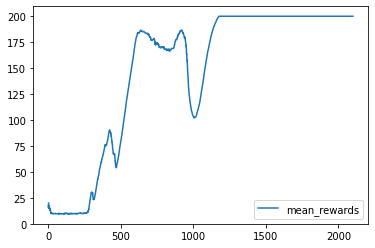

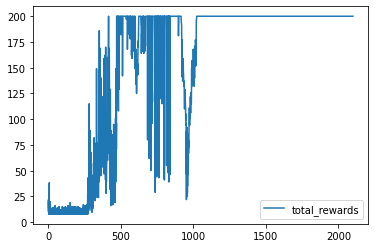

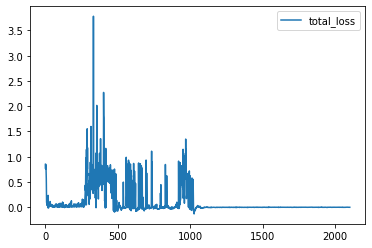

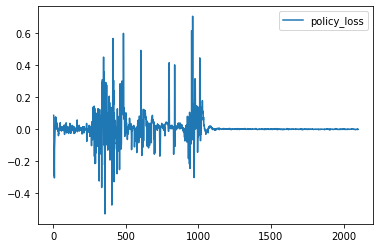

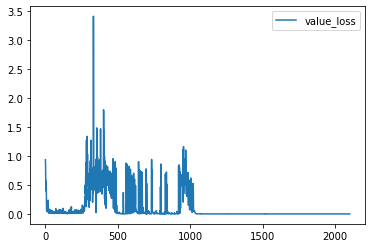

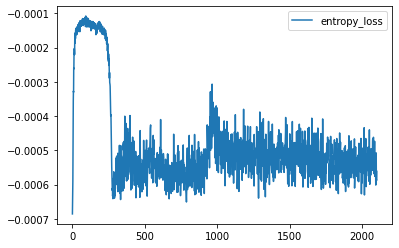

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

from src.agents import DiscreteActorCritic
from src.networks import DiscreteActorCriticNetwork

GAMMA = 0.99
LEARNING_RATE = 0.01
ENTROPY_BETA = 0.001
N_STEPS = 8
BATCH_SIZE = 16

CHECKPOINT_PATH = os.path.join("models", "01_cartpole_ac.tar")


if __name__ == "__main__":
    env = gym.make("CartPole-v0")
    env.reset()
    device = torch.device("cpu")
    net = DiscreteActorCriticNetwork(
        env.observation_space.shape[0], env.action_space.n
    ).to(device)

    agent = DiscreteActorCritic(
        env=env,
        net=net,
        device=device,
        gamma=GAMMA,
        beta_entropy=ENTROPY_BETA,
        lr=LEARNING_RATE,
        n_steps=N_STEPS,
        batch_size=BATCH_SIZE,
        # chk_path=None,
        chk_path=CHECKPOINT_PATH,
    )
    agent.train(100, verbose_every=0)
    agent.plot_performance()